# Procrastinate Pro+

Procrastinate Pro+ - развлекательное приложение. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель исследования:** разобраться в причинах убытков и составить рекомендации, которые помогут компании выйти в плюс.

**Ход исследования:**   
1. Обзор данных: приведение типов, проверка на дубликаты, форматирование;
1. Определение функций необходимых для рассчета и визуализации конверсии, удержания, LTV и  ROI;
1. Исследовательский анализ: построение профилей пользователей, изучение из каких стран, каналов приходят пользователи и какими устройствами пользуются
1. Маркетинговый анализ: определение общих затрат и CAC
1. Оценка окупаемости рекламы

## Загрузка данных и подготовка к анализу


### Загрузка файлов и проверка содержимого

In [1]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Получаем данные из файлов
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('datasets/visits_info_short.csv')
    orders = pd.read_csv('datasets/orders_info_short.csv')
    costs = pd.read_csv('datasets/costs_info_short.csv')

### Visits

In [3]:
#проверяем содержимое
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
#проверяем на дубликаты 
if visits.duplicated().sum() > 0:
    print('Найдено дубликатов:', visits.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Необходимо привести столбцы `Session Start` и `Session End` к типу datetime
- Необходимо отформатировать название столбцов
- После приведения типов проверим данные на аномалии (нет ли таких сессий где дата начала позже даты конца)

In [5]:
#переименовываем столбцы
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [6]:
#приводим типы данных
visits['session_start'] =  pd.to_datetime(visits['session_start'])
visits['session_end'] =  pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Orders

In [7]:
#проверяем содержимое
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
#проверяем на дубликаты 
if orders.duplicated().sum() > 0:
    print('Найдено дубликатов:', orders.duplicated().sum())
else:
    print('Явных дубликатов не обнаружено')

Явных дубликатов не обнаружено


- Пропусков нет
- Дубликатов нет
- Необходимо привести столбец `Event Dt` к типу datetime
- Необходимо отформатировать название столбцов

In [9]:
#переименовываем столбцы
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [10]:
#приводим типы данных
orders['event_dt'] =  pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### Costs

In [11]:
#проверяем содержимое
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


- Пропусков нет
- Дубликатов нет
- Необходимо привести столбец `dt` к типу date
- Необходимо отформатировать название столбцов

In [12]:
#переименовываем столбцы
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [13]:
#приводим типы данных
costs['dt'] =  pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Выводы

Данные пригодны для работы. Внесены необходимые корректировки.

## Определение функции для расчета и анализа LTV, ROI, удержания и конверсии

### Retention

Создадим функцию `get_retention()`, которая рассчитывает коэффициент удержания.
Функция принимает: 
- `profiles` — профили пользователей,
- `sessions` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.


In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Conversion

Создадим функцию `get_conversion()`, которая рассчитывает конверсию
Функция принимает: 
- `profiles` — профили пользователей,
- `purchases` — данные о покупках,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions` - параметры для разделения пользователей на группы
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [16]:
def get_conversion(
    profiles,
    purchases,  
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### LTV и ROI

Создадим функцию `get_ltv()`, которая рассчитывает LTV и ROI.
Функция принимает: 
- `profiles` — профили пользователей,
- `purchases` — данные о покупках,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions` - параметры для разделения пользователей на группы
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Дополнительно зададим функцию для сглаживания фрейма.

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Исследовательский анализ данных

### Построение профилей пользователей. Определение минимальной и максимальной даты привлечения

Зададим функцию, которая строит профили пользователей.   
Функция принимает:
- `sessions` - данные из журнала посещений пользователей
- `orders` - данные о покупках
- `ad_costs` - данные о рекламе

In [20]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [21]:
#вызовем функцию и проверим результат
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Определим минимальную и максимальную даты привлечения пользователей.

In [22]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

print('Минимальная дата:',min_analysis_date)
print('Максимальная дата:',max_analysis_date)

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27


Даты соотвествуют ТЗ.

### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

Напишем функцию, которая будет принимать профили и параметр для группировки и возвращать таблицу в необходимом формате.

In [23]:
def get_table(profiles, dimention): 
    profiles_table = profiles.pivot_table(
            index=dimention, columns='payer', values='user_id', aggfunc='nunique'
        )
    profiles_table.columns = ['no-payer', 'payer']
    profiles_table['total'] =  profiles_table['no-payer'] + profiles_table['payer']
    profiles_table['payer_perc'] = profiles_table['payer']/profiles_table['total'] * 100
    profiles_table = profiles_table.drop(columns = ['no-payer', 'payer'])
    profiles_table = profiles_table.sort_values(by='payer_perc', ascending=False)
    
    return profiles_table 

In [24]:
#вызовем функцию
get_table(profiles, 'region')

,total,payer_perc
region,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


Для данного раздела возьмем горизонт анализа `14 дней` и определим дату наблюдения 1 ноября 2019

In [25]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Проанализируем конверсию платящих пользователей с разбивкой по странам.

Наибольшая общая доля платящих пользователей в **США**

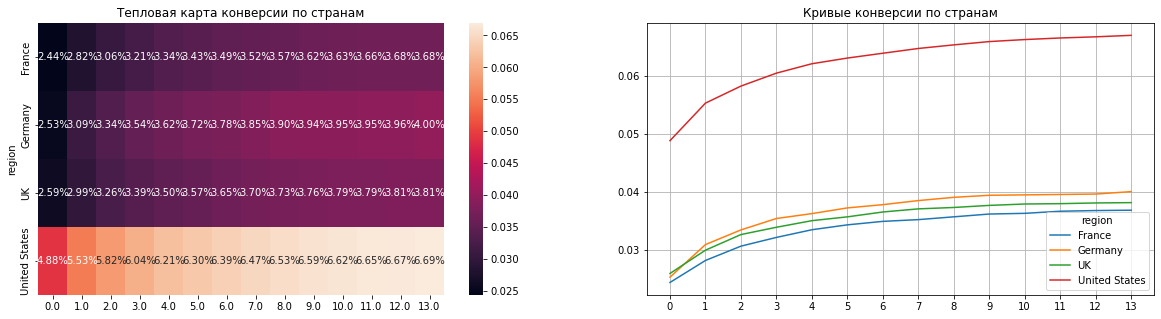

In [26]:
# получаем конверсию с разбивкой по регионам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])


sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

**США** дает больше всех платящих пользователей.

### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [27]:
#вызовем функцию с разделением по устройствам
get_table(profiles, 'device')

,total,payer_perc
device,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


Проанализируем конверсию платящих пользователей с разбивкой по устройствам.

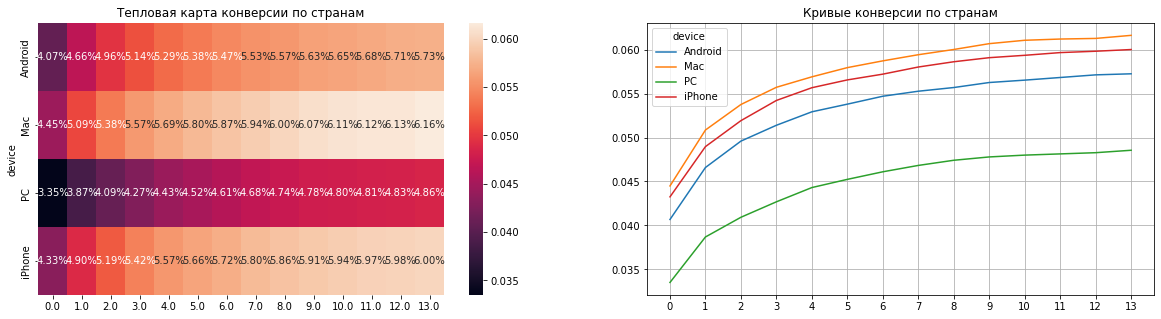

In [28]:
# получаем конверсию с разбивкой по регионам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

Чаще всего платящие пользователи заходят с **Mac**. Самая низкая конверсия у пользователей PC

### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [29]:
#вызовем функцию с разделением по каналам
get_table(profiles, 'channel')

,total,payer_perc
channel,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


Проанализируем конверсию платящих пользователей с разбивкой по каналам привлечения.

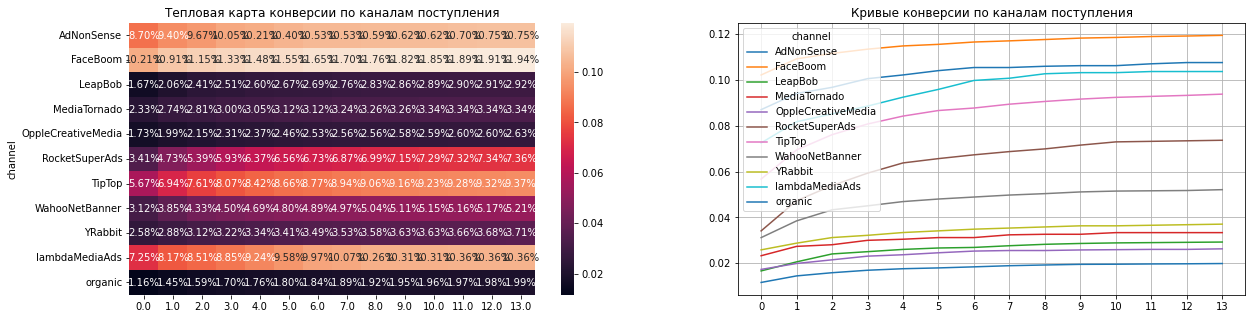

In [30]:
# получаем конверсию с разбивкой по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plt.figure(figsize = (20, 5)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по каналам поступления')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по каналам поступления')

plt.show() 

Наиболее высокая конверсия у **FaceBoom**. Этот источник привлекает больше всего платящих пользователей.

## Маркетинг

Для данного и последующих разделов удалим профили органических пользователей, так как на них не было рекламных затрат

In [31]:
#оставляем только неорганичесие профили
profiles = profiles.query('channel != "organic"')

 ### Определение затрат

Определим общую сумму расходов на маркетинг

In [32]:
print('Общие расходы на маркетинг:', costs['costs'].sum().round())

Общие расходы на маркетинг: 105497.0


**Построим распределение трат по источникам**

Text(0.5, 1.0, 'Затраты по источникам')

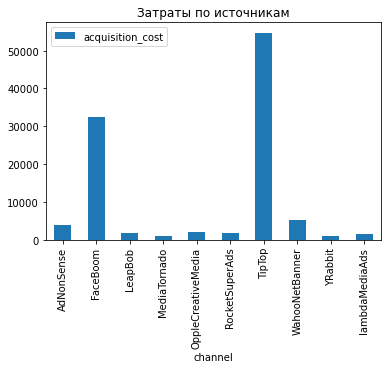

In [33]:
#создадим сводную таблицу
costs_table = profiles.pivot_table(
            index='channel', values='acquisition_cost', aggfunc='sum'
        )
    

#построим столбчатую диаграмму
costs_table.plot(kind='bar')
plt.title('Затраты по источникам')

Самые большие расходы на источник `TipTop`, на втором месте `FaceBoom`, самые низкие -  `YRabbit` 

**Построим распределение трат по странам**

Text(0.5, 1.0, 'Затраты по странам')

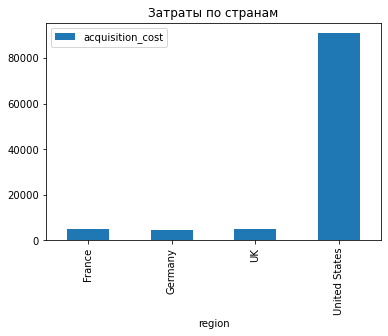

In [34]:
#создадим сводную таблицу
costs_table = profiles.pivot_table(
            index='region', values='acquisition_cost', aggfunc='sum'
        )
    

#построим столбчатую диаграмму
costs_table.plot(kind='bar')
plt.title('Затраты по странам')

**Построим распределение общих затрат по месяцам**

Text(0.5, 1.0, 'Затраты по месяцам')

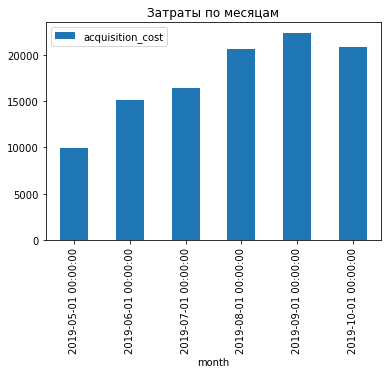

In [35]:
#создадим сводную таблицу
costs_table = profiles.pivot_table(
            index='month', values='acquisition_cost', aggfunc='sum'
        )

#построим столбчатую диаграмму   
costs_table.plot(kind='bar')
plt.title('Затраты по месяцам')

Самые высокие затраты были в сентябре, самые низние - в мае.

**Визуализируем помесячные затраты в разбивке по источникам**

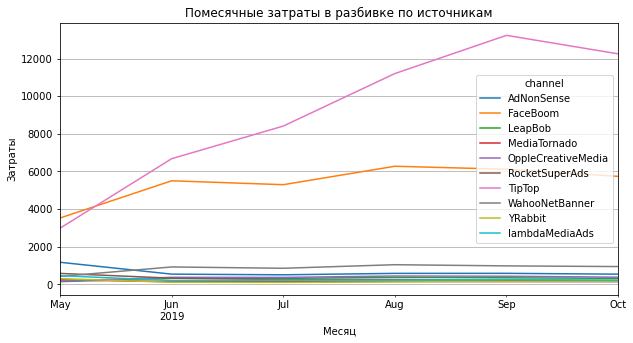

In [36]:
#создадим сводную таблицу
costs_grouped = profiles.pivot_table(
    index = 'month',
    columns = 'channel',
    values = 'acquisition_cost', 
    aggfunc='sum'
)

#построим график
costs_grouped.plot(grid=True, figsize = (10, 5))
plt.title('Помесячные затраты в разбивке по источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

plt.show() 

Затраты на `Tiptop` и `FaceBoom` сильно превышают затраты на остальные источники

### Сколько в среднем стоило привлечение одного покупателя

In [37]:
#посчитаем среднюю стоимость привлечения клиента
print(profiles['acquisition_cost'].mean())

1.127481323942928


### Сколько в среднем стоило привлечение одного покупателя из каждого источника

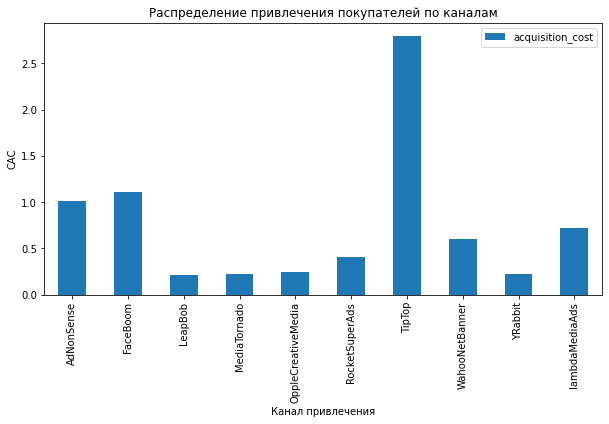

In [38]:
#создалим сводную таблицу и построим диаграмму
profiles_grouped = profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
)
profiles_grouped.plot(kind='bar', figsize=(10, 5) )
plt.ylabel('CAC')
plt.xlabel('Канал привлечения')
plt.title('Распределение привлечения покупателей по каналам')
plt.show()

Наибольшая стоимость привлечения пользователя у канала `TipTop` (2.8). Наименьшая у `LeapBob` (0.21).

## Оценка окупаемости рекламы для привлечения пользователей

### Анализ общей окупаемости рекламы

Рассчитаем и визуализируем LTV и ROI

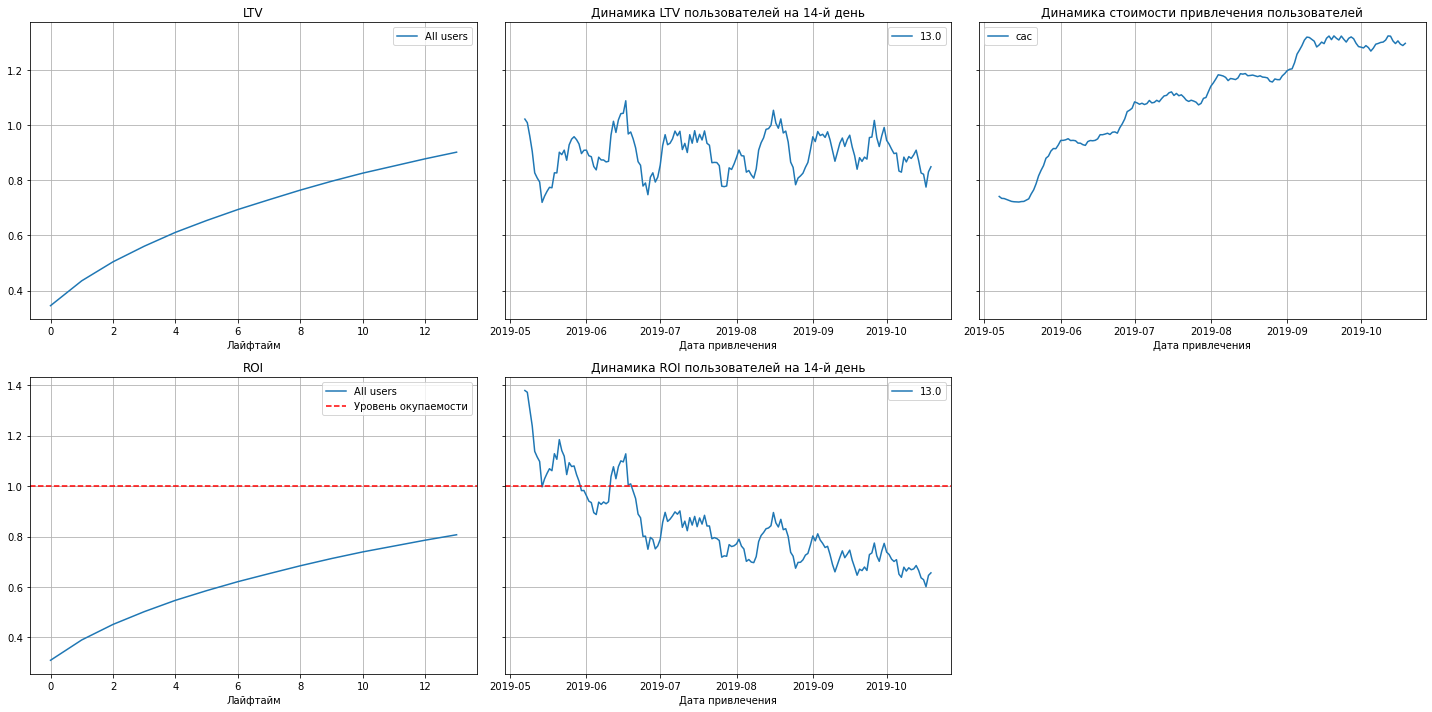

In [39]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы**
- Реклама не окупается. К концу срока ROI приближается к уровню окупаемости, но не переступает его. В динамике ROI только падает ниже уровня окупаемости
- CAC растет, значит рекламный бюджет увеличивается со временем
- На LTV изменяется закономерно, значит качество пользователей не меняется

### Анализ окупаемости рекламы с разбивкой по устройствам

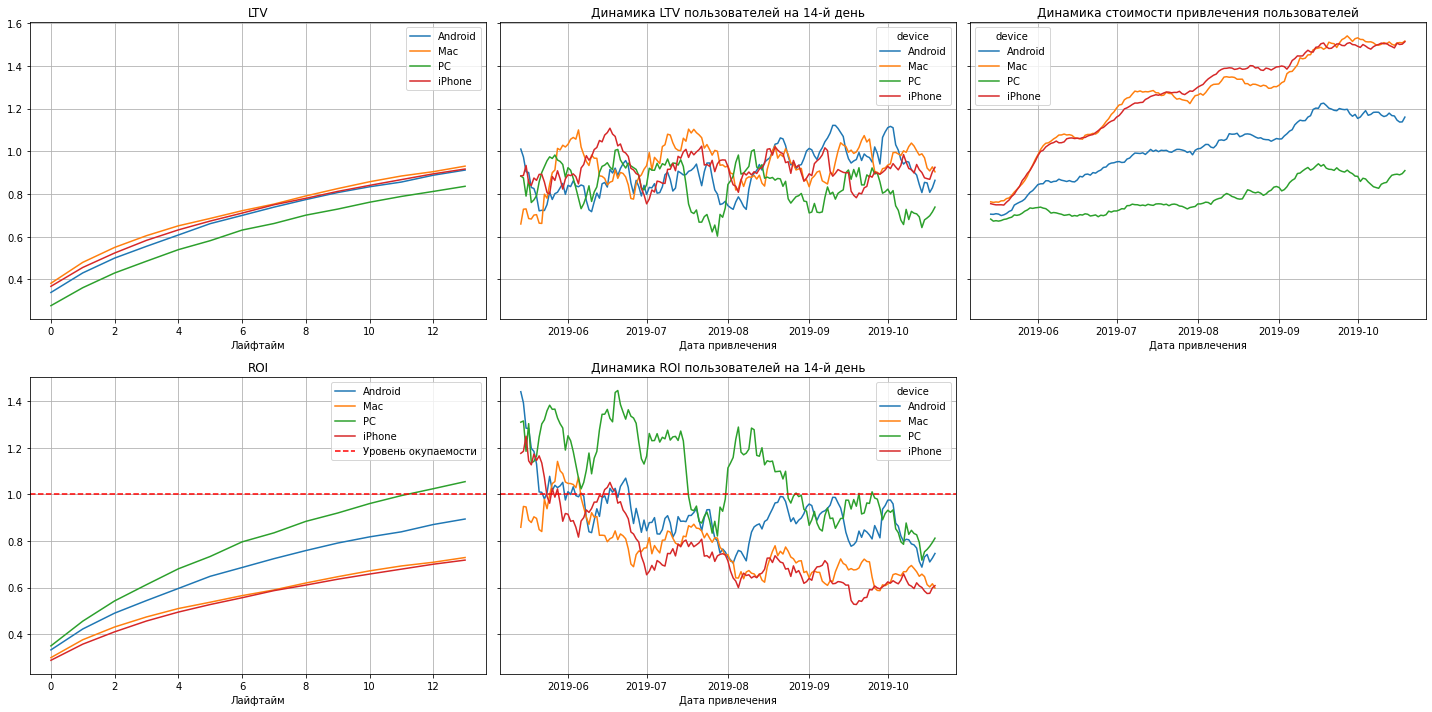

In [40]:
#задаем параметр для группировки
dimensions = ['device']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы**  
 Реклама окупается для пользователей PC примерно с 11-го дня привлечения, но в динамике реклама не окупается для всех устройств.

Хотя по графикам конверсии выше можно увидеть, что платящие пользователи чаще заходят с Mac и iPhone. Проверим удержание c разбивкой по по устройствам.

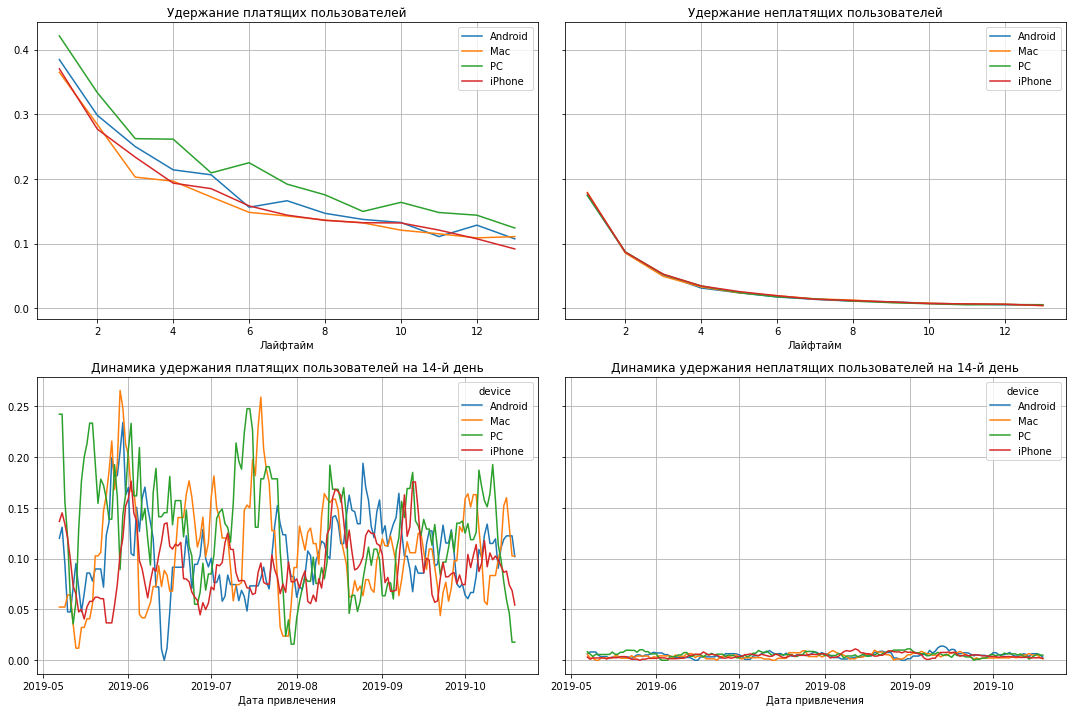

In [41]:
#задаем параметр для группировки
dimensions = ['device']

# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей Mac и iPhone не выделяется на фоне удержания пользователей Android и PC. 

### Анализ окупаемости рекламы с разбивкой по странам

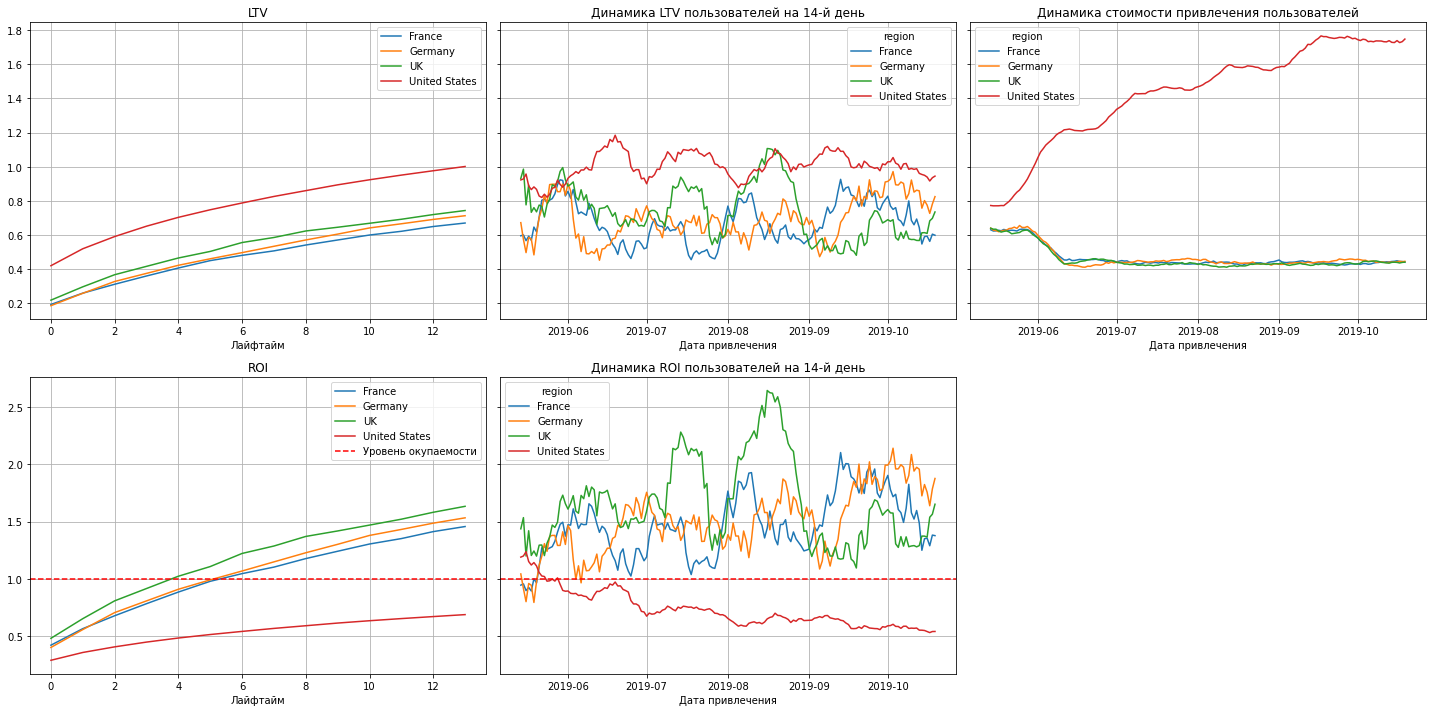

In [42]:
#задаем параметр для группировки
dimensions = ['region']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы**  
- Пользователи из США не окупаются. ROI не достигает уровня окупаемости, а в динамике падает ниже его
- В динамике затраты на привлечение пользователей из США растут. 

При этом по графикам конверсии выше можно видеть, что США приносит больше всех платящих пользователей. Проверим удержание с разбивкой по странам.

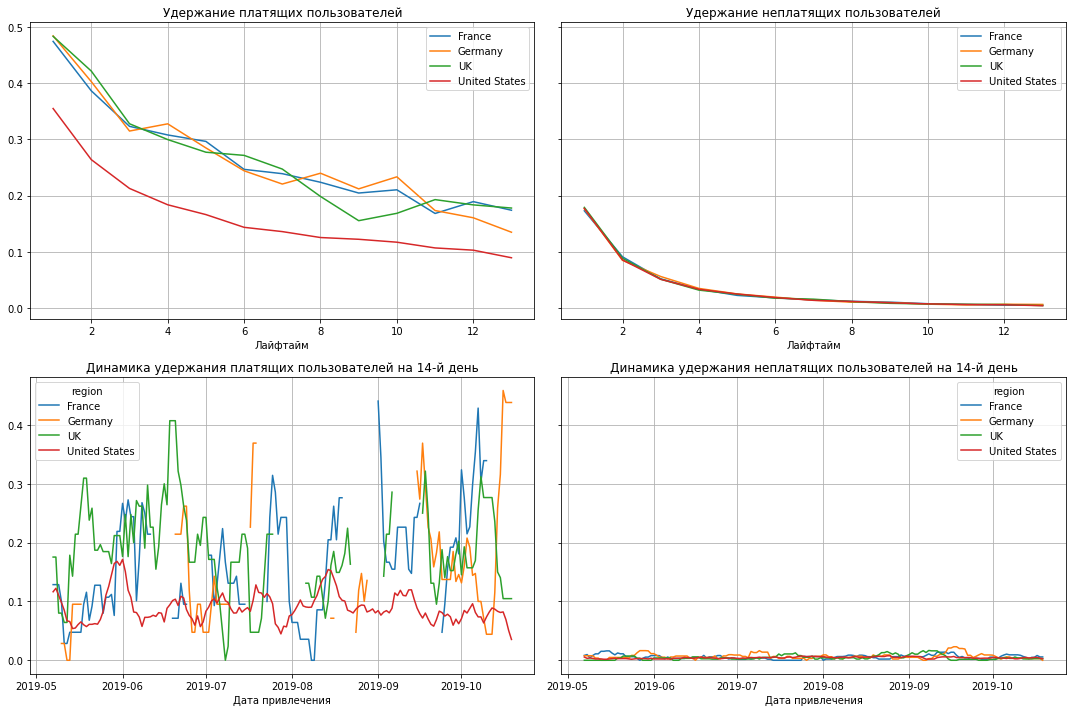

In [43]:
#задаем параметр для группировки
dimensions = ['region']

# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи из США удерживаются хуже, чем пользователи из других стран. 

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

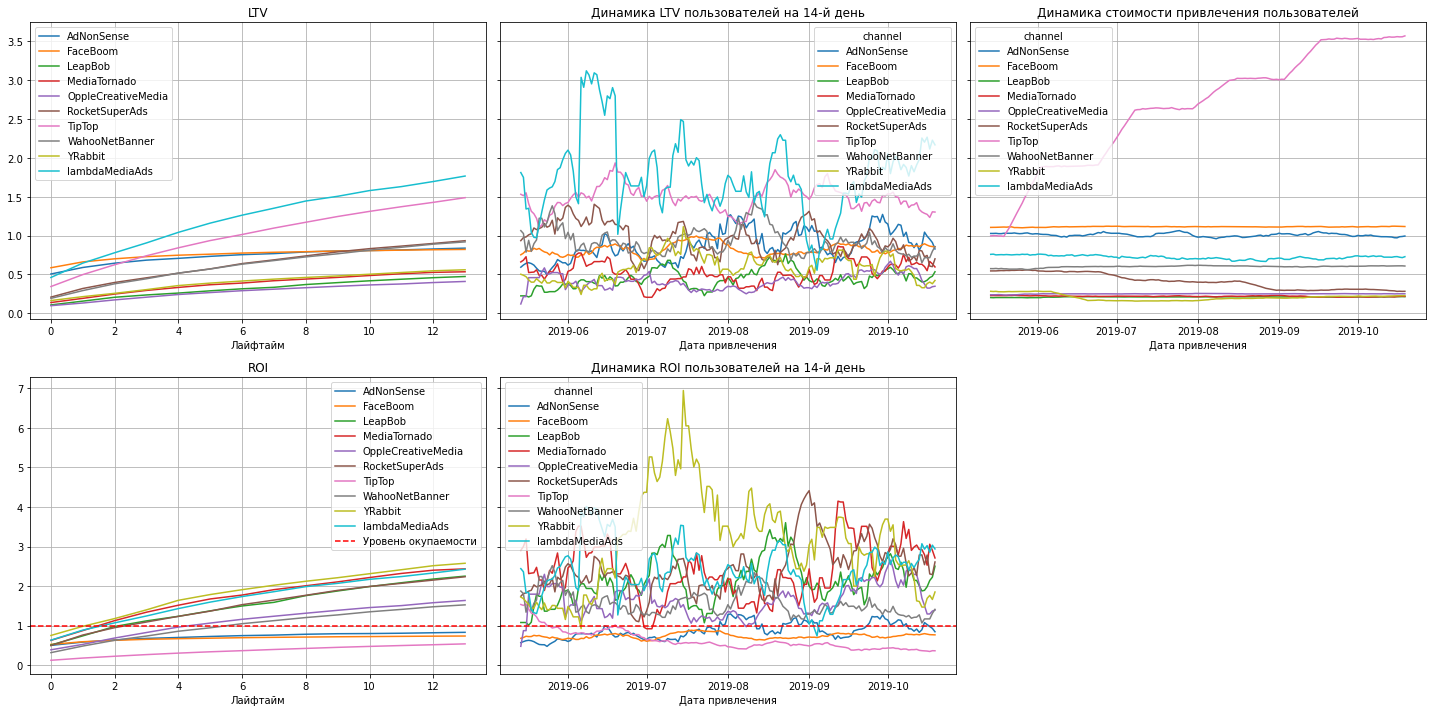

In [44]:
#задаем параметр для группировки
dimensions = ['channel']

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Выводы:**

- Пользователи, пришедшие с самого доргогого канала **Tiptop** не окупаются. Его ROI не достигает уровня окупаемости, а в динамике падает ниже. 
- У источника с самой высокой конверсией **FaceBoom** так же не окупаются пользователи
- Также не окупаются пользователи из канала **AdNonSence**
- Затраты на привлечение пользователей из канала **TipTop** растут
    
У данного источника не самая высокая конверсия. Проверим удержание с разбивкой по источникам.

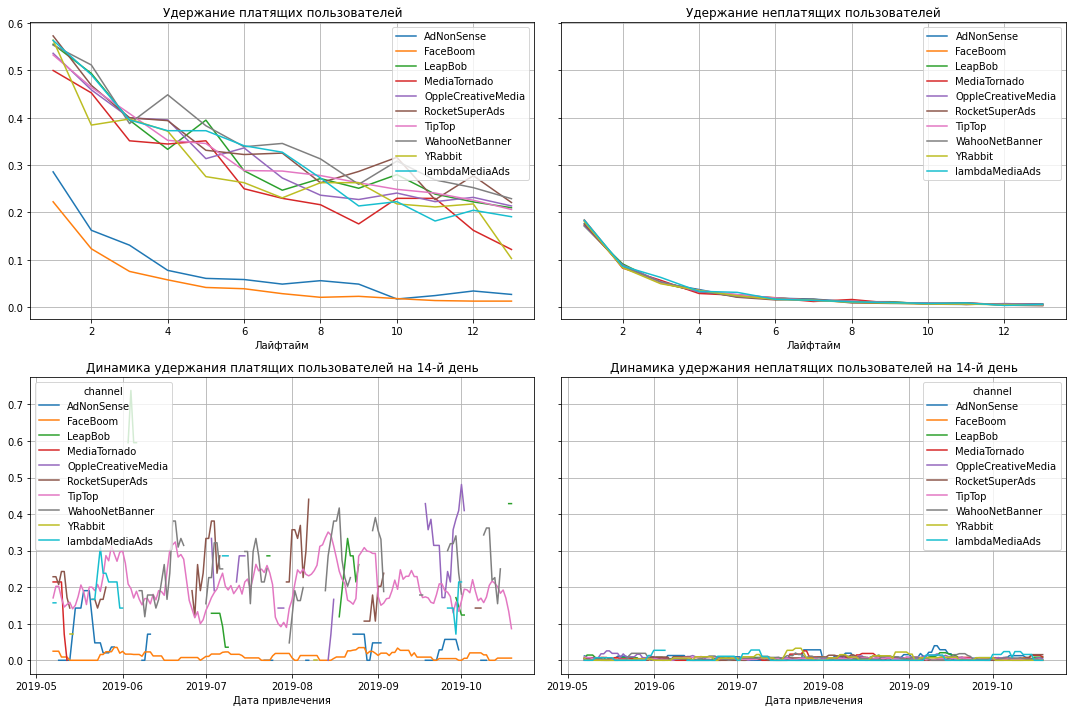

In [45]:
#задаем параметр для группировки
dimensions = ['channel']

# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Платящие пользователи **FaceBoom** и **AdNonSence** удерживаются хуже других источников.

## Выводы

**1. Плохое удержание "дорогих" пользователей**  
Платящие пользователи из когорт, имеющих наиболее высокую конверсию и одни из самых высоких затрат на рекламу, удерживаются плохо. А именно:
- Пользователи из **США**;
- Пользователи, поступившие из канала **FaceBoom**;

То есть эти пользователи стоят дорого, привлекаются хорошо, но быстро уходят.

**2. Не окупается реклама для "дорогих" пользователей**   
Платящие пользователи из из следующих категорий привлекаются хорошо, но реклама на них не окупается: 

- Пользователи из **США**;
- Пользователи, поступившие из каналов **FaceBoom**, **TipTop**, **AdNonSence**;
- Пользователи **Mac**, **iPhone**, **Android** 


**Рекомендации** 
1. Необходимо выяснить причину плохого удержания пользователей;
2. Пересмотреть распределение рекламного бюджета между источниками. Например обратить внимание на источники **Yrabbit** и **RocketSuperAds** и **lambdaMediaAds**. У них низкие затраты на рекламу, высокая окупаемость и удержание не меньше большинства других источников.
